In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv("../data/melb_data.csv")

# EDA

In [10]:
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [16]:
df.shape

(13580, 21)

In [13]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [14]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [15]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [96]:
df.iloc[df["Price"].argmax(),]

Suburb                             Mulgrave
Address                         35 Bevis St
Rooms                                     3
Type                                      h
Price                             9000000.0
Method                                   PI
SellerG                                Hall
Date                             29/07/2017
Distance                               18.8
Postcode                             3170.0
Bedroom2                                3.0
Bathroom                                1.0
Car                                     1.0
Landsize                              744.0
BuildingArea                          117.0
YearBuilt                            1960.0
CouncilArea                          Monash
Lattitude                         -37.93168
Longtitude                        145.16126
Regionname       South-Eastern Metropolitan
Propertycount                        7113.0
Name: 12094, dtype: object

In [93]:
df["YearBuilt"].argmin()

9968

In [94]:
df.iloc[9968,]

Suburb                 Mount Waverley
Address                5 Armstrong St
Rooms                               3
Type                                h
Price                       1200000.0
Method                             VB
SellerG                       McGrath
Date                       24/06/2017
Distance                         14.2
Postcode                       3149.0
Bedroom2                          3.0
Bathroom                          1.0
Car                               4.0
Landsize                        807.0
BuildingArea                    117.0
YearBuilt                      1196.0
CouncilArea                    Monash
Lattitude                   -37.86788
Longtitude                  145.12121
Regionname       Eastern Metropolitan
Propertycount                 13366.0
Name: 9968, dtype: object

In [87]:
corr = df.select_dtypes('number').corr()
corr

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


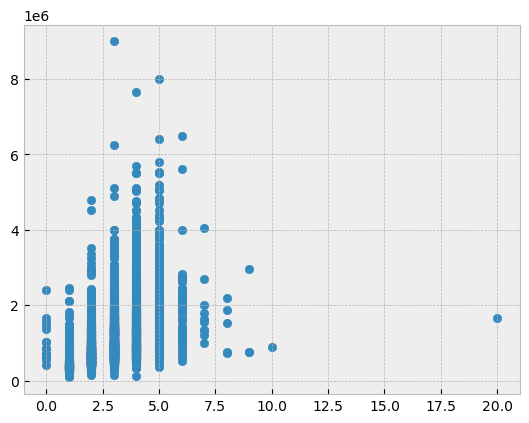

In [89]:
plt.scatter("Bedroom2", "Price", data = df)

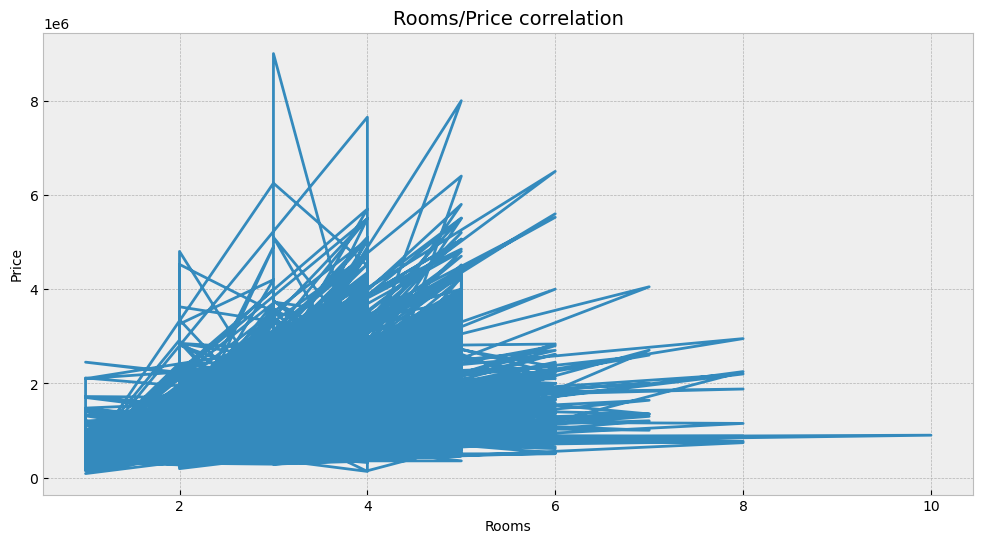

In [17]:
plt.figure(figsize = (12, 6))
plt.style.use("bmh")
plt.plot('Rooms', 'Price', data=df)
plt.xlabel('Rooms', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.title('Rooms/Price correlation', loc='Center', fontsize=14)
plt.show()

In [76]:
sellers = df.groupby("SellerG").agg("size").to_frame().reset_index()

In [77]:
sellers = sellers.rename(columns = {"SellerG" : "agent", 0 : "count"})

In [78]:
top_sellers = sellers.sort_values("count", ascending= False).head(12)

In [79]:
top_sellers.head()

,agent,count
155,Nelson,1565
106,Jellis,1316
260,hockingstuart,1167
16,Barry,1011
196,Ray,701


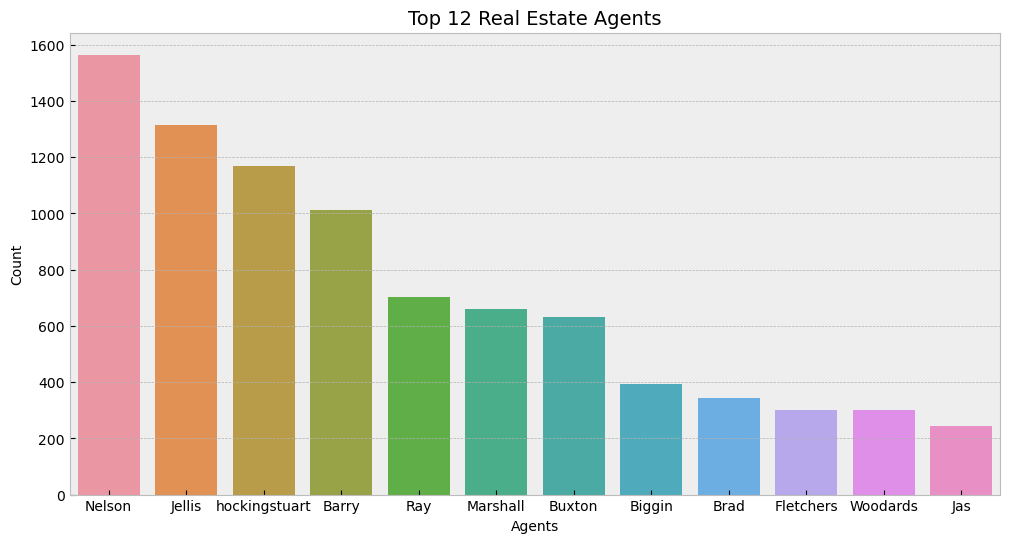

In [80]:
plt.figure(figsize = (12, 6))
plt.style.use("bmh")
sns.barplot(data = top_sellers, x = "agent", y = "count")
plt.xlabel('Agents', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Top 12 Real Estate Agents', loc='Center', fontsize=14)
plt.show()

In [120]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [137]:
data = df.select_dtypes('number')

In [138]:
data = data.drop(["Lattitude", "Longtitude"], axis = 1)

In [139]:
data = data.dropna()

In [140]:
X = data.drop("Price", axis =1)

In [141]:
y = data["Price"]

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

In [143]:
reg = GradientBoostingRegressor(random_state=0)

In [144]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [145]:
reg.predict(X_test[1:2])

array([895537.1546012])

In [146]:
reg.score(X_test, y_test)

0.7883572937417528

In [147]:
from sklearn.ensemble import RandomForestRegressor

In [148]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [149]:
regr.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)

In [150]:
regr.score(X_test, y_test)

0.48328654696909545